## Exercise.1) Perform simple linear regression for salary dataset and find out the basic salary for freshers and 11 years of experience.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Predicted salary for freshers : 25792.20019866869
Predicted salary for 11 years of experience: 129741.78573467454


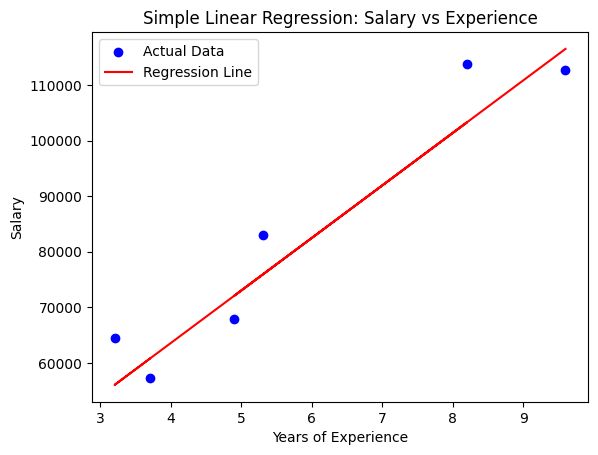

In [15]:
df_salary = pd.read_csv("C:/Users/vijes/Downloads/ML_s4_LAB/labsheet_4/Salary_Data (1).csv")
x = df_salary['YearsExperience']
y = df_salary['Salary']
mean_X = x.mean()
mean_Y = y.mean()
num = ((x - mean_X) * (y - mean_Y)).sum()
den = ((x - mean_X) ** 2).sum()
beta1 = num / den
beta0 = mean_Y - beta1 * mean_X
salary_freshers = beta0 + beta1 * 0
salary_11_years = beta0 + beta1 * 11
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_pred = beta0 + beta1 * X_test
print(f"Predicted salary for freshers : {salary_freshers:}")
print(f"Predicted salary for 11 years of experience: {salary_11_years:}")
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression: Salary vs Experience")
plt.legend()
plt.show()

In [16]:
z=[0,11]
for i in range(len(z)):
    yi= beta0 + beta1 * z[i]
    print("predicted salary for ",z[i],"years:",yi)

predicted salary for  0 years: 25792.20019866869
predicted salary for  11 years: 129741.78573467454


### Explanation :
#### This code performs simple linear regression to predict salaries based on years of experience, calculates predicted salaries for freshers and individuals with 11 years of experience, and visualizes the regression line against actual data.

## Exercise.2) Predict the sales for sales dataset and find out the difference between the predicted and actual sales.

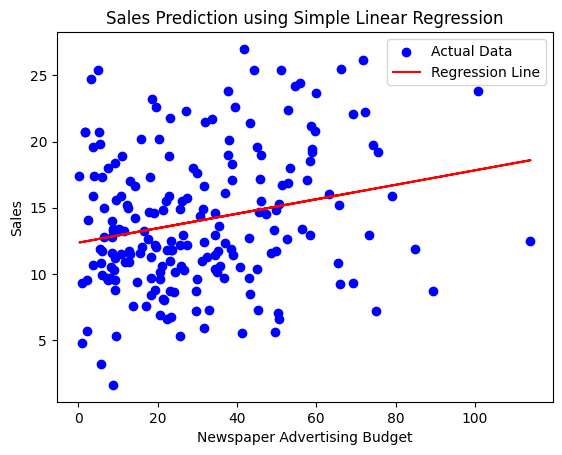

   newspaper  sales  Predicted_Sales  Difference
0       69.2   22.1        16.136169    5.963831
1       45.1   10.4        14.818066   -4.418066
2       69.3    9.3        16.141639   -6.841639
3       58.5   18.5        15.550953    2.949047
4       58.4   12.9        15.545484   -2.645484


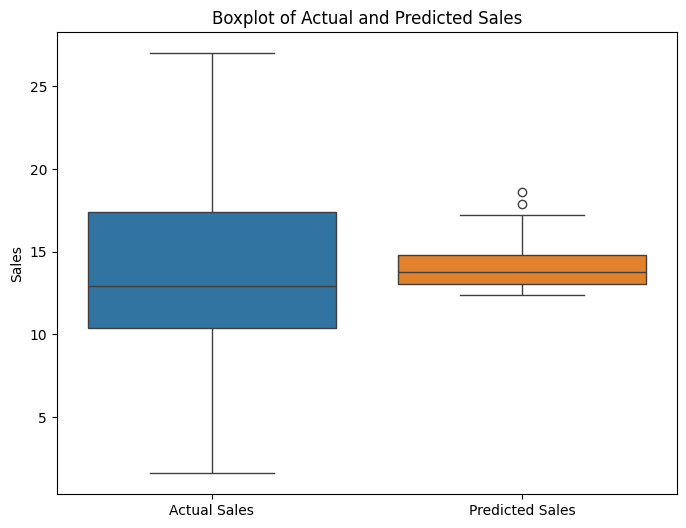

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("C:/Users/vijes/Downloads/ML_s4_LAB/labsheet_4/sales.xlsx")
x = data["newspaper"].values
y = data["sales"].values
def act_pred(x, y):
    n = np.size(x)  
    x_m = x.mean()
    y_m = y.mean()
    n = ((y - y_m) * (x - x_m)).sum()
    d = ((x- x_m) ** 2).sum()
    b1 = n / d 
    b0 = y_m - (b1 * x_m) 
    return b0, b1
b0, b1 = act_pred(x, y)
y_pred = b1 * x + b0
data["Predicted_Sales"] = y_pred
data["Difference"] = data["sales"] - data["Predicted_Sales"]
plt.scatter(x, y, color='blue', label="Actual Data")  # Scatter plot of actual data
plt.plot(x, y_pred, color='red', label="Regression Line")  # Regression line
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.title("Sales Prediction using Simple Linear Regression")
plt.legend()
plt.show()
print(data.head())
# Create a DataFrame with Actual and Predicted Sales
box_data = pd.DataFrame({
    "Actual Sales": data["sales"],
    "Predicted Sales": data["Predicted_Sales"]})
plt.figure(figsize=(8, 6))
sns.boxplot(data=box_data)
plt.ylabel("Sales")
plt.title("Boxplot of Actual and Predicted Sales")
plt.show()

### Explanation :
#### This code reads a sales dataset from an Excel file, extracts the newspaper advertising budget and sales values, and then performs simple linear regression to predict sales based on the budget by calculating the slope and intercept using the least squares method. It then adds the predicted sales and the difference between actual and predicted sales to the DataFrame, visualizes the actual data points with a regression line using a scatter plot, and displays a boxplot to compare the distribution of actual and predicted sales.

## Exercise.3) You are given with a co2 emission dataset, you need to find out which features will be influencing the co2 emission the most. Use appropriate EDA tools for finding out the best features. Justify also.

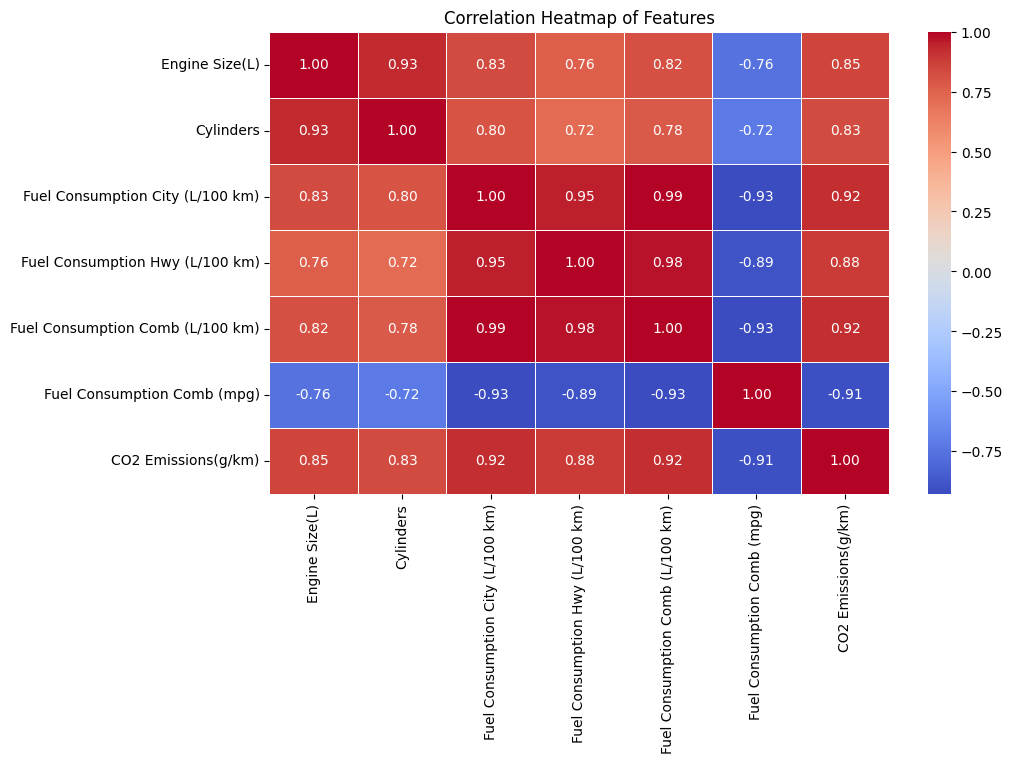

Top Correlated Features:
 CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Hwy (L/100 km)     0.883536
Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Consumption Comb (mpg)        -0.907426
Name: CO2 Emissions(g/km), dtype: float64
Intercepts :
51.178969966714874
Coefficients :
[ 1.15664196 10.8139163   1.37476643  5.61132846  6.43506312]


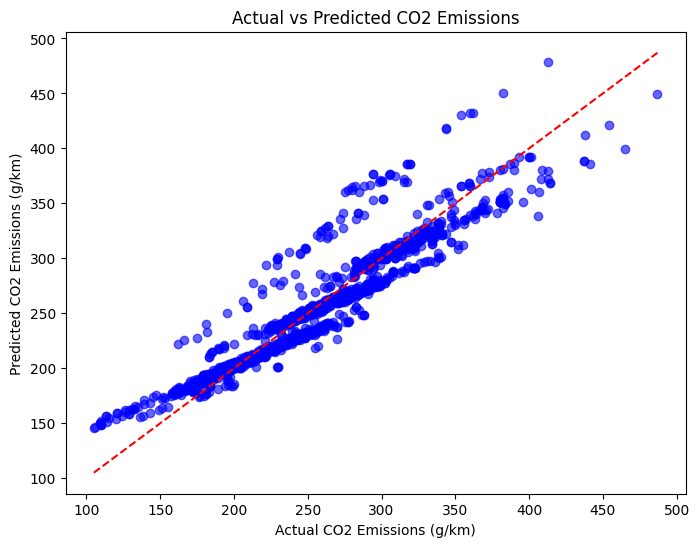

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("C:/Users/vijes/Downloads/ML_s4_LAB/labsheet_4/CO2 Emissions_Canada.csv")
df.dropna(inplace=True)

# Correlation Analysis 
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Top 5 features excluding CO2
target = 'CO2 Emissions(g/km)'
correlated_features = correlation_matrix[target].sort_values(ascending=False)
print("Top Correlated Features:\n", correlated_features)

# Top 5 features excluding CO2
independent_vars = correlated_features.index[1:6]
X = df[independent_vars]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
print("Intercepts :")
print(intercept)
print("Coefficients :")
print(coefficients)

# Regression Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Actual vs Predicted CO2 Emissions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.show()


### Explanation :
#### This code reads a CO2 emissions dataset, cleans the data by removing missing values, performs correlation analysis to identify the most influential features, visualizes the correlations using a heatmap, selects the top five correlated features (excluding the target variable) as independent variables, splits the data into training and testing sets, trains a linear regression model to predict CO2 emissions, prints the model’s intercept and coefficients to understand the relationship between variables, and finally evaluates the model by plotting a scatter plot of actual versus predicted emissions along with a reference line to indicate perfect predictions.










## Exercise.4) For Ex1 and Ex2 perform the same prediction but by using Gradient descent method. Create your own function for finding out the predictions.

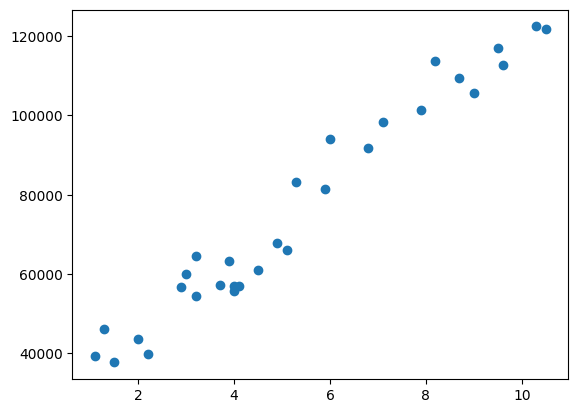

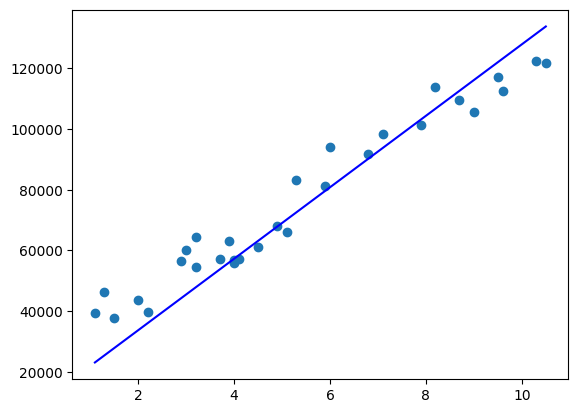

b0 :  10159.395956941373  b1 :  11769.805022974024


In [11]:
# for salary data
df=pd.read_csv("C:/Users/vijes/Downloads/ML_s4_LAB/labsheet_4/Salary_Data (1).csv")
x=df['YearsExperience']
y=df['Salary']
plt.scatter(x,y)
plt.show()
b0=0
b1=0
a=0.0001
n=len(x)
for i in range(1,10000):
    y_pred=b0+b1*x
    grad_b1=(-2/n)*np.sum((y-y_pred)*x)
    grad_b0=(2/n)*np.sum(y_pred-y)
    b0=b0-(a*grad_b0)
    b1=b1-(a*grad_b1)
plt.scatter(x,y)
plt.plot(x,b0+b1*x,color='blue')
plt.show()
print("b0 : ",b0," b1 : ",b1)

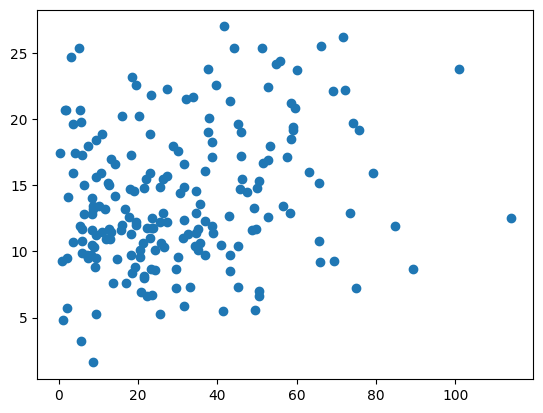

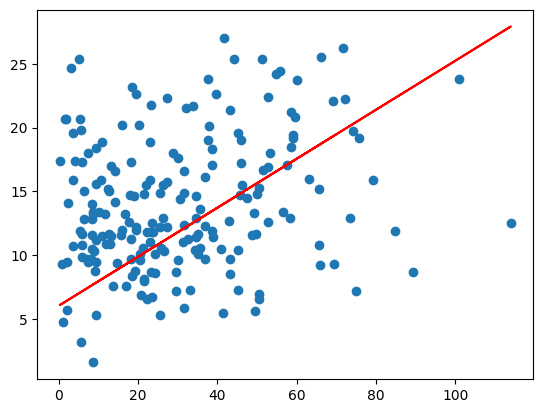

b0 :  6.042276006763207  b1 :  0.19188091074019434


In [12]:
# for sales data
df=pd.read_excel("C:/Users/vijes/Downloads/ML_s4_LAB/labsheet_4/sales.xlsx")
x=df['newspaper']
y=df['sales']
plt.scatter(x,y)
plt.show()
b0=0
b1=0
a=0.0001
n=len(x)
for i in range(1,10000):
    y_pred=b0+b1*x
    grad_b1=(-2/n)*np.sum((y-y_pred)*x)
    grad_b0=(2/n)*np.sum(y_pred-y)
    b0=b0-(a*grad_b0)
    b1=b1-(a*grad_b1)
plt.scatter(x,y)
plt.plot(x,b0+b1*x,color='red')
plt.show()
print("b0 : ",b0," b1 : ",b1)

### Explanation :
#### This code reads salary and sales datasets, visualizes the relationship between years of experience and salary, as well as newspaper advertising budget and sales, then performs gradient descent to iteratively update the coefficients (b0 and b1) for simple linear regression by minimizing the mean squared error, plots the resulting regression lines on scatter plots of the data, and finally prints the optimized coefficients for both datasets.